# Assignment 3
### Due 9/23. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os


In [2]:
data = pd.read_csv("/home/john/ds5030/understanding_uncertainty/data/ames_prices.csv")
data.head(10)

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
5,6,527105030,1604,195500,60,RL,78.0,9978,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
6,7,527127150,1338,213500,120,RL,41.0,4920,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
7,8,527145080,1280,191500,120,RL,43.0,5005,Pave,NaN,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
8,9,527146030,1616,236500,120,RL,39.0,5389,Pave,NaN,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
9,10,527162130,1804,189000,60,RL,60.0,7500,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [3]:
import pandas as pd
df = pd.DataFrame({'category': ['A', 'B', 'C', 'D', 'E', 'F']})
df['category'] = df['category'].astype('category')
print('Example categories for df:', df['category'].cat.categories)
if 'data' in globals():
    col = 'MS Zoning'
    if col in data.columns:
        data[col] = data[col].astype('category')
        print('\nCategories for', col, ':', data[col].cat.categories)
    else:
        print('\nColumn', col, 'not found in data; available columns:', list(data.columns))


Example categories for df: Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

Column MS Zoning not found in data; available columns: ['Order', 'PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace

In [4]:
if 'data' in globals():
    col1 = 'Fireplaces'
    col2 = 'Pool.Area'
    if col1 in data.columns and col2 in data.columns:
        contingency_table = pd.crosstab(data[col1], data[col2])
        print('\nContingency table between', col1, 'and', col2, ':\n', contingency_table)




Contingency table between Fireplaces and Pool.Area :
 Pool.Area    0    144  228  368  444  480  512  519  555  561  576  648  738  \
Fireplaces                                                                     
0           1421    0    0    0    0    0    0    0    0    1    0    0    0   
1           1267    0    1    1    1    0    1    0    0    0    1    1    1   
2            218    1    0    0    0    0    0    1    1    0    0    0    0   
3             11    0    0    0    0    1    0    0    0    0    0    0    0   
4              0    0    0    0    0    0    0    0    0    0    0    0    0   

Pool.Area   800  
Fireplaces       
0             0  
1             0  
2             0  
3             0  
4             1  


In [5]:
data[['Fireplaces', 'Pool.Area']].isnull().sum()
if 'data' in globals():
    col1 = 'Fireplaces'
    col2 = 'Pool.Area'
    if col1 in data.columns and col2 in data.columns:
        contingency_table = pd.crosstab(data[col1], data[col2], normalize='index') * 100
        print('\nContingency table (in percentages) between', col1, 'and', col2, ':\n', contingency_table)


Contingency table (in percentages) between Fireplaces and Pool.Area :
 Pool.Area         0         144       228       368       444       480  \
Fireplaces                                                                
0           99.929677  0.000000  0.000000  0.000000  0.000000  0.000000   
1           99.450549  0.000000  0.078493  0.078493  0.078493  0.000000   
2           98.642534  0.452489  0.000000  0.000000  0.000000  0.000000   
3           91.666667  0.000000  0.000000  0.000000  0.000000  8.333333   
4            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Pool.Area        512       519       555       561       576       648  \
Fireplaces                                                               
0           0.000000  0.000000  0.000000  0.070323  0.000000  0.000000   
1           0.078493  0.000000  0.000000  0.000000  0.078493  0.078493   
2           0.000000  0.452489  0.452489  0.000000  0.000000  0.000000   
3           0.000000  0.000000  

## Interesting Patterns

I chose the Ames housing data because it has clean data for both of the variables I chose: fireplaces and pools as expressed in pool area. I summarized the data as percentages and found it interesting that 100% of the houses with four fireplaces, the largest number, also have the largest number sized pool are of 800 square feet. I have to believe this is the head coach's house of the Iowa State football team resident in Ames. Also, most people in Ames don't have pools until they have three fireplaces. Makes sense that larger, more well appointed houses would be the ones to have pools.


2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [6]:
meta = pd.read_csv("/home/john/ds5030/understanding_uncertainty/data/nhanes_meta_17_18.csv")
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
print(meta) #meta
#print(f'Data frame shape: {df.shape}')
#print(f'Data frame variables: {df.columns}')
#df.head(10)

                        VariableNameLong Variable     Type  Format  Informat  \
0                 GeneralHealthCondition   HSD010  Numeric     NaN       NaN   
1           EverBreastfedOrFedBreastmilk   DBQ010  Numeric     NaN       NaN   
2            AgeStoppedBreastfeedingdays   DBD030  Numeric     NaN       NaN   
3                 AgeFirstFedFormuladays   DBD041  Numeric     NaN       NaN   
4         AgeStoppedReceivingFormuladays   DBD050  Numeric     NaN       NaN   
..                                   ...      ...      ...     ...       ...   
192  UnitOfMeasureDayweekmonthyear_2_SMQ  SMQ852U  Numeric     NaN       NaN   
193      CurrentSelfreportedHeightInches   WHD010  Numeric     NaN       NaN   
194      CurrentSelfreportedWeightPounds   WHD020  Numeric     NaN       NaN   
195          TriedToLoseWeightInPastYear   WHQ070  Numeric     NaN       NaN   
196     TimesLost10LbsOrMoreToLoseWeight   WHQ225  Numeric     NaN       NaN   

                                       

In [7]:
import pandas as pd
# Example 1: create a DataFrame with a categorical column and show categories
df = pd.DataFrame({'category': ['A', 'B', 'C', 'D', 'E', 'F']})
# convert to categorical dtype (required to use .cat)
df['category'] = df['category'].astype('category')
print('Example categories for df:', df['category'].cat.categories)

#everusedheroin = data1['EverUsedHeroin']
#feelingbadaboutself = data1['HowOftenFeelBadAboutSelf']
if 'data1' in globals():
    col1 = 'EverUsedHeroin' 
    col2 = 'HowOftenFeelBadAboutSelf' 
    if col1 in data1.columns and col2 in data1.columns:
        contingency_table = pd.crosstab(data1[col1], data1[col2], normalize='index') * 100
        print('\nContingency table (in percentages) between', col1, 'and', col2, ':\n', contingency_table)

Example categories for df: Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


WaistCircumferenceCm	            BMXWAIST	
EverToldDoctorHadTroubleSleeping	SLQ050

In [8]:
#convert relevant columns to categorical dtype
if 'data1' in globals():
    cat_cols = ['EverToldDoctorHadTroubleSleeping']  # add more categorical column names as needed
    for col in cat_cols:
        if col in data1.columns:
            data1[col] = data1[col].astype('category')
            print('Categories for', col, ':', data1[col].cat.categories)
        else:
            print('Column', col, 'not found in data1; available columns:', list(data1.columns))

#check missing values in these columns
data1[['SLQ050', 'BMXWAIST', 'BMXWAISTIN', 'BMXWAISTM']].isnull().sum()

#descriptive statistics grouped by categorical variable
if 'data1' in globals():
    cat_col = 'SLQ050'  # categorical variable
    num_col = 'BMXWAIST'  # numeric variable
    if cat_col in data1.columns and num_col in data1.columns:
        desc_stats = data1.groupby(cat_col)[num_col].describe()
        print('\nDescriptive statistics of', num_col, 'grouped by', cat_col, ':\n', desc_stats)  # adjust max_rows and max_cols as needed


NameError: name 'data1' is not defined

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

## Image of Equation

I linked the image in markdown, but it still isn't working so I have linked it on Google Drive here:

https://drive.google.com/file/d/11qtUkpght1s0mWlkmf1EPVn1vywwn5lG/view?usp=sharing

![Alt text](lclsder.jpg "LCLS/Naradaya-Watson Estimator")

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv('/home/john/ds5030/understanding_uncertainty/data/ames_prices.csv')
pd.set_option('display.max_columns', None)
df.head(10)

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
5,6,527105030,1604,195500,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
6,7,527127150,1338,213500,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
7,8,527145080,1280,191500,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
8,9,527146030,1616,236500,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1.0

In [ ]:
np.sum(df.isna(), axis = 0)
print(np.sum(df.isna(), axis = 0))
#print(df.isna().sum())

Order                 0
PID                   0
area                  0
price                 0
MS.SubClass           0
MS.Zoning             0
Lot.Frontage        490
Lot.Area              0
Street                0
Alley              2732
Lot.Shape             0
Land.Contour          0
Utilities             0
Lot.Config            0
Land.Slope            0
Neighborhood          0
Condition.1           0
Condition.2           0
Bldg.Type             0
House.Style           0
Overall.Qual          0
Overall.Cond          0
Year.Built            0
Year.Remod.Add        0
Roof.Style            0
Roof.Matl             0
Exterior.1st          0
Exterior.2nd          0
Mas.Vnr.Type       1775
Mas.Vnr.Area         23
Exter.Qual            0
Exter.Cond            0
Foundation            0
Bsmt.Qual            80
Bsmt.Cond            80
Bsmt.Exposure        83
BsmtFin.Type.1       80
BsmtFin.SF.1          1
BsmtFin.Type.2       81
BsmtFin.SF.2          1
Bsmt.Unf.SF           1
Total.Bsmt.SF   

In [ ]:
df = df.loc[:,['price', 'Garage.Area']]
df = df.dropna()
df = df.reset_index()
y = df['price']
x = df['Garage.Area']

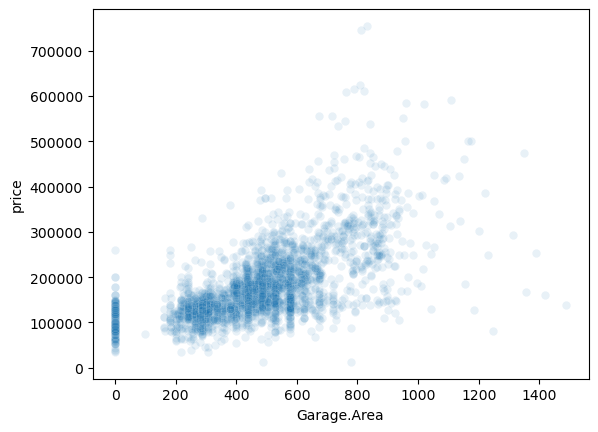

In [ ]:
sns.scatterplot(y=y,x=x,alpha = .1)
plt.show()

In [ ]:
grid = np.linspace( x.min(), x.max(), 100)

N = len(x)

h = 1.06 * np.std(x) * N**(-0.2)

In [ ]:
def kernel(u):
    '''Epanechnikov, for variety.'''
    k = .75 * (1-u**2) * int( np.abs(u) <= 1)
    return k

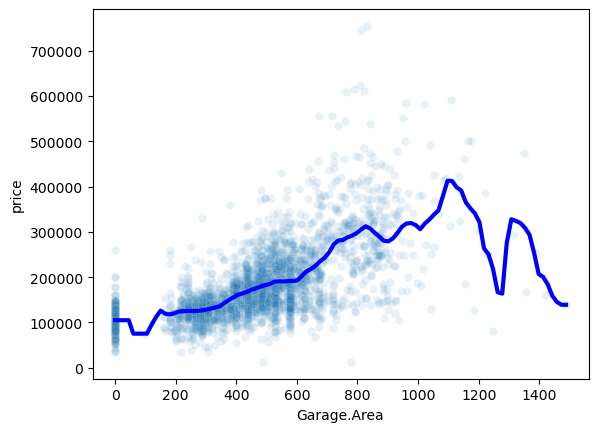

In [ ]:
cef = []
for z in grid:
    num = 0
    den = 0
    for i, data in enumerate(x):
        k_data = kernel( (z-data)/h )/(N*h) 
        den += k_data
        num += y[i] * k_data
    y_hat_z = num/den 
    cef.append(y_hat_z)


sns.scatterplot(y=y,x=x,alpha = .1)
sns.lineplot(x=grid,y=cef,color='blue',lw=3)
plt.show()

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome